   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   

/home/kali/.local/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Using 5 neighbors: (0.7434895833333334, 0.011862543722844131)
Using 10 neighbors: (0.73828125, 0.01242108335178315)
Using 15 neighbors: (0.7578124999999999, 0.025911131174651547)
KNN Accurancy for different neighbors amount:  [0.7239583333333333, 0.74609375, 0.7434895833333334, 0.7317708333333333, 0.73828125, 0.7486979166666666, 0.7578124999999999, 0.7513020833333334, 0.7565104166666667, 0.76171875, 0.7565104166666666, 0.7526041666666667, 0.7447916666666667, 0.7330729166666666, 0.7317708333333334, 0.73046875]


[]

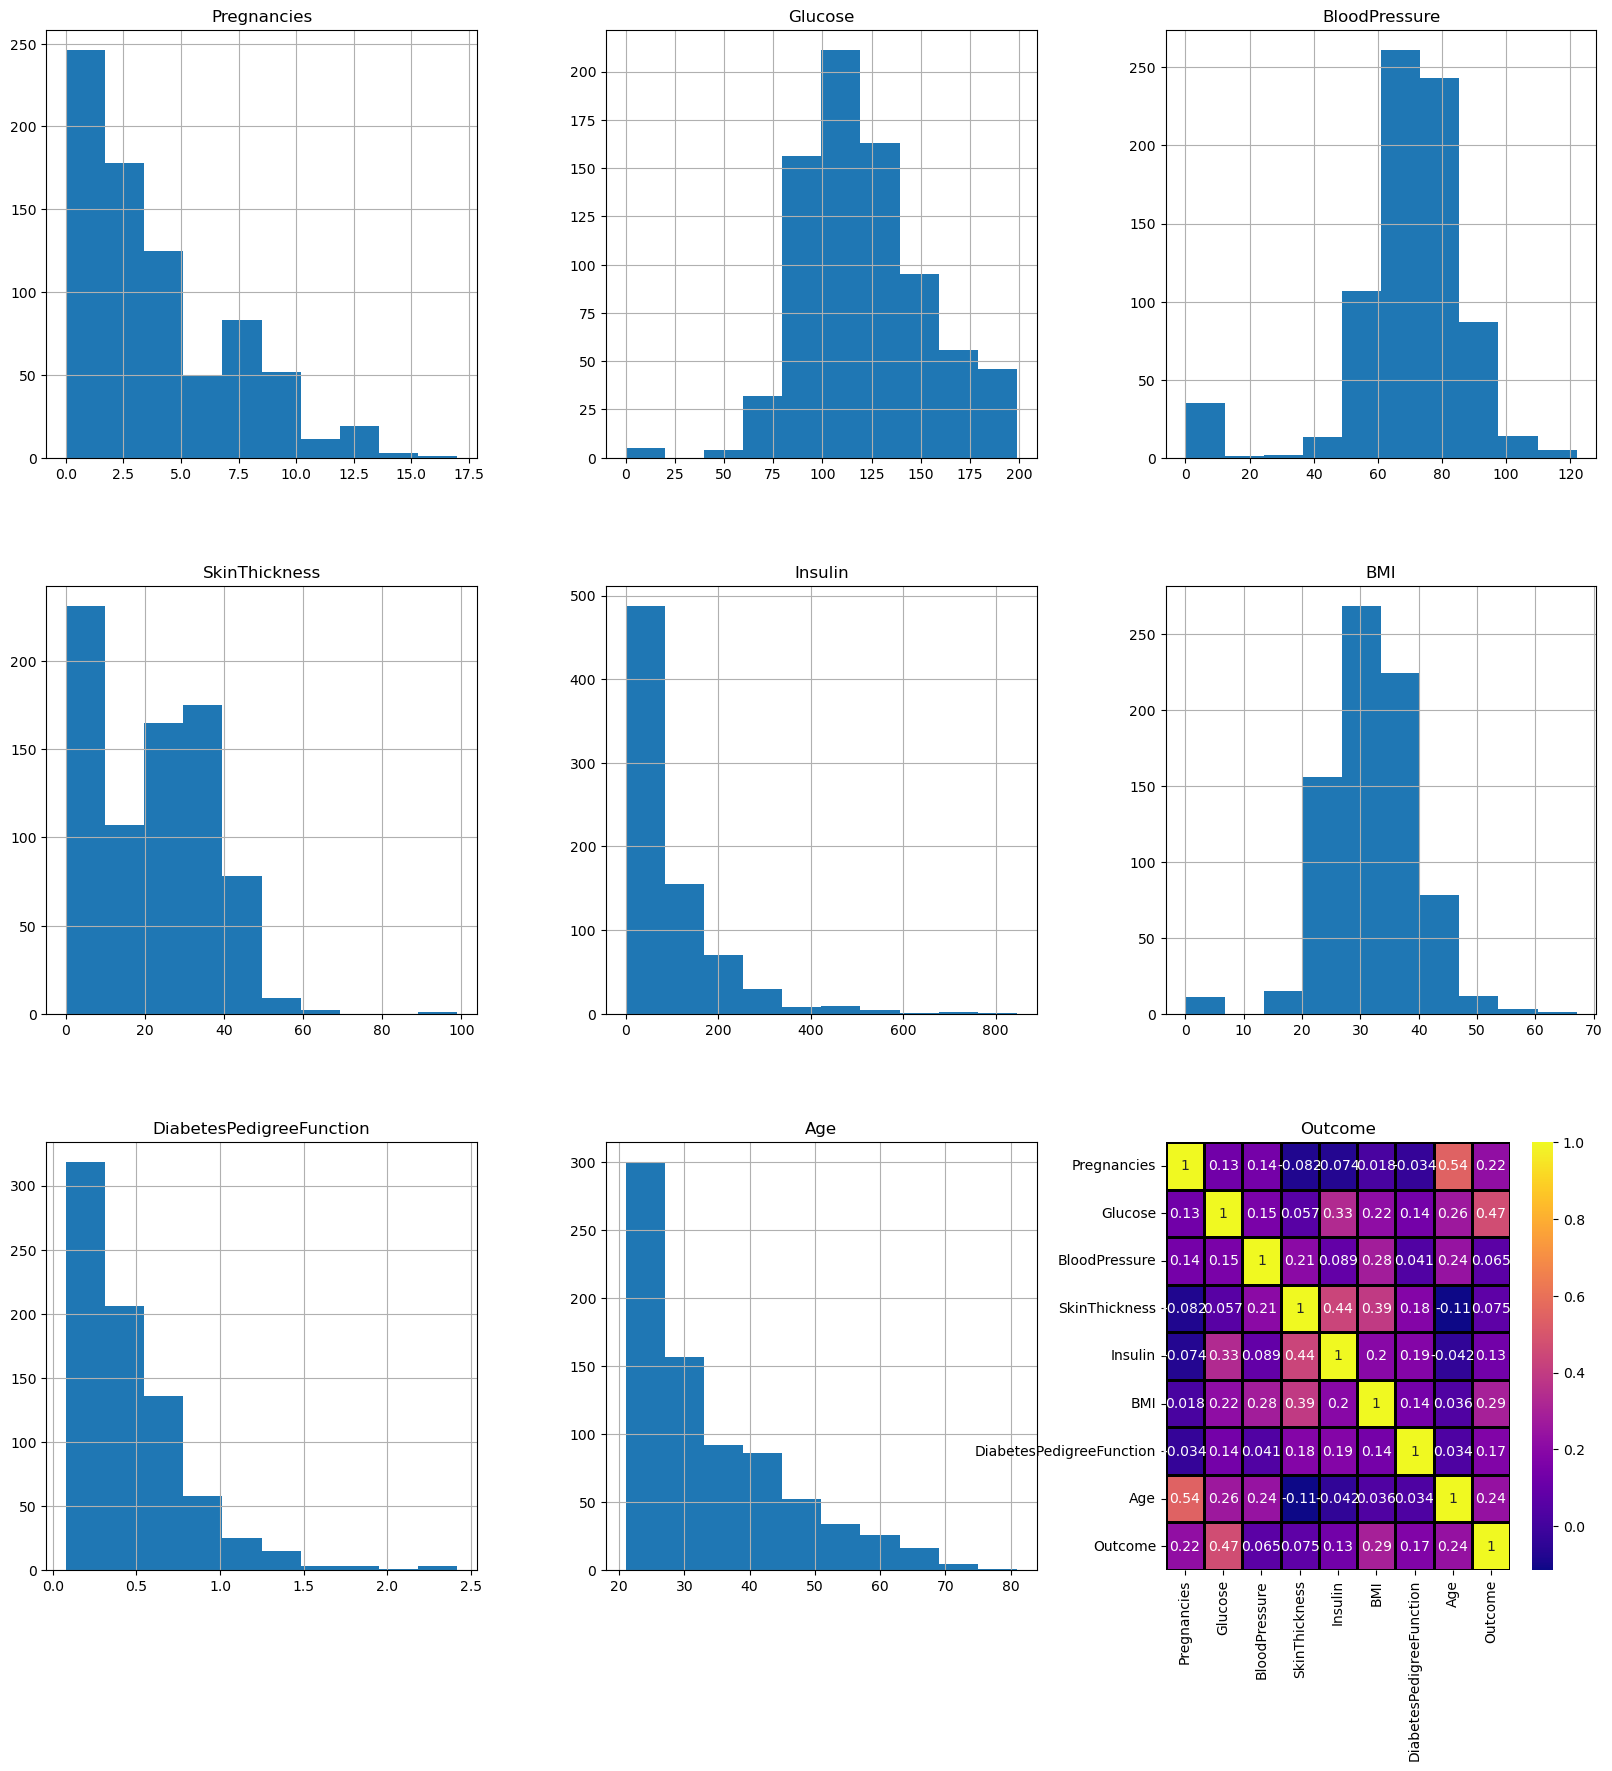

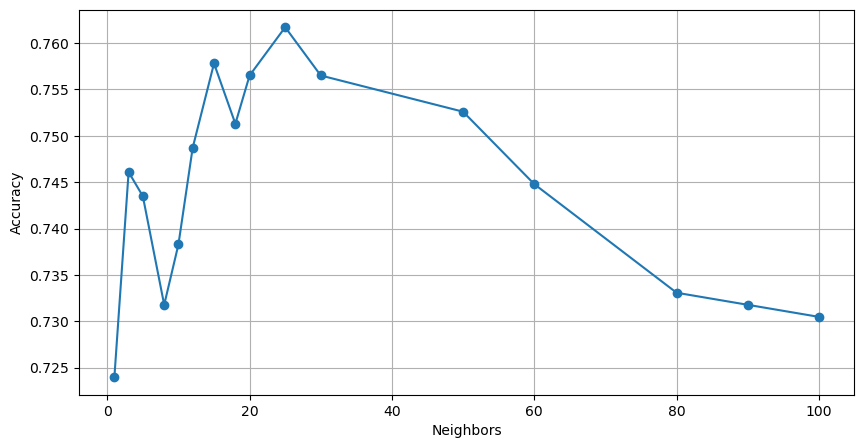

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix 

%matplotlib inline

diabetes_df = pd.read_csv('diabetes.csv')

print(diabetes_df.head())
print(diabetes_df.describe())

p = diabetes_df.hist(figsize = (20,20))

X = diabetes_df.drop(['Outcome'], axis=1)
y = diabetes_df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)

tc = diabetes_df.corr()
 
# plot a heatmap of the correlated data
sns.heatmap(tc, annot = True, cmap ='plasma', 
            linecolor ='black', linewidths = 1)


from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict using the Random Forest classifier
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random forest: ", rf_accuracy)

from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict using the Decision Tree classifier
dt_predictions = dt_classifier.predict(X_test)

# Calculate accuracy for Decision Tree
print("Decision tree: ", classification_report(y_test, dt_predictions))


from sklearn.model_selection import GridSearchCV 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 


# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_)

grid_predictions = grid.predict(X_test) 
  
# print classification report 
print("SVC: ", classification_report(y_test, grid_predictions)) 

from sklearn.ensemble import AdaBoostClassifier
adaboost_classifier = AdaBoostClassifier(base_estimator=dt_classifier, n_estimators=50, random_state=42)
adaboost_classifier.fit(X_train, y_train)

# Predict using the AdaBoost classifier
adaboost_predictions = adaboost_classifier.predict(X_test)

# Calculate accuracy for AdaBoost
print("AdaBoost: ", accuracy_score(y_test, adaboost_predictions))



from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

def get_kneighbors_score(X, y, k):
    model = KNeighborsClassifier(n_neighbors=k)

    scores = cross_val_score(model, X, y, cv=4)
    
    return (scores.mean(), scores.std())


print(f"Using 5 neighbors: {get_kneighbors_score(X, y, 5)}")
print(f"Using 10 neighbors: {get_kneighbors_score(X, y, 10)}")
print(f"Using 15 neighbors: {get_kneighbors_score(X, y, 15)}")

parameters = [1, 3, 5, 8, 10, 12, 15, 18, 20, 25, 30, 50,60,80,90,100]

def get_kneighbors_score(k):
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X, y, cv=4)
    return scores.mean()

ACC_dev = []
for k in parameters:
    scores=get_kneighbors_score(k)
    ACC_dev.append(scores)
print("KNN Accurancy for different neighbors amount: ", ACC_dev)
f, ax = plt.subplots(figsize=(10,5))

plt.plot(parameters, ACC_dev, 'o-')
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')

plt.grid()
plt.plot()